# Calculus Fundamentals: Comprehensive Demonstration


**Purpose:** Demonstrating competency in fundamental calculus concepts

This notebook covers:
- Taylor Series Expansions
- Limits & Derivatives from First Principles
- Properties of Derivatives & Chain Rule
- Partial Derivatives
- Jacobian Matrix
- Convex vs Non-Convex Functions
- Curvature & Second Derivatives

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from scipy.optimize import minimize
from matplotlib import cm

# Setting plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)



---
## 1. Taylor Series Expansions

### 1.1 Definition

A Taylor series is an infinite sum of terms calculated from the values of a function's derivatives at a single point. For a function $f(x)$ around point $a$:

$$f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + ...$$

When $a=0$, this is called a **Maclaurin series**. The Taylor series allows us to approximate complex functions using polynomials.

### 1.2 Example

Computing the Taylor series expansion of $e^x$ around $x=0$:

$$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...$$

In [ ]:
import math

def taylor_exp(x, n_terms):
    """
    Taylor series approximation of e^x
    Parameters:
    x: input value
    n_terms: number of terms in the series
    """
    result = 0
    for n in range(n_terms):
        result += (x ** n) / math.factorial(n)
    return result

# Example calculation
x_val = 2
for n in [1, 2, 3, 5, 10]:
    approx = taylor_exp(x_val, n)
    actual = np.exp(x_val)
    error = abs(approx - actual)
    print(f"n={n:2d} terms: Approximation = {approx:.6f}, Actual = {actual:.6f}, Error = {error:.6f}")

n= 1 terms: Approximation = 1.000000, Actual = 7.389056, Error = 6.389056
n= 2 terms: Approximation = 3.000000, Actual = 7.389056, Error = 4.389056
n= 3 terms: Approximation = 5.000000, Actual = 7.389056, Error = 2.389056
n= 5 terms: Approximation = 7.000000, Actual = 7.389056, Error = 0.389056
n=10 terms: Approximation = 7.388713, Actual = 7.389056, Error = 0.000344


### 1.3 Visualization

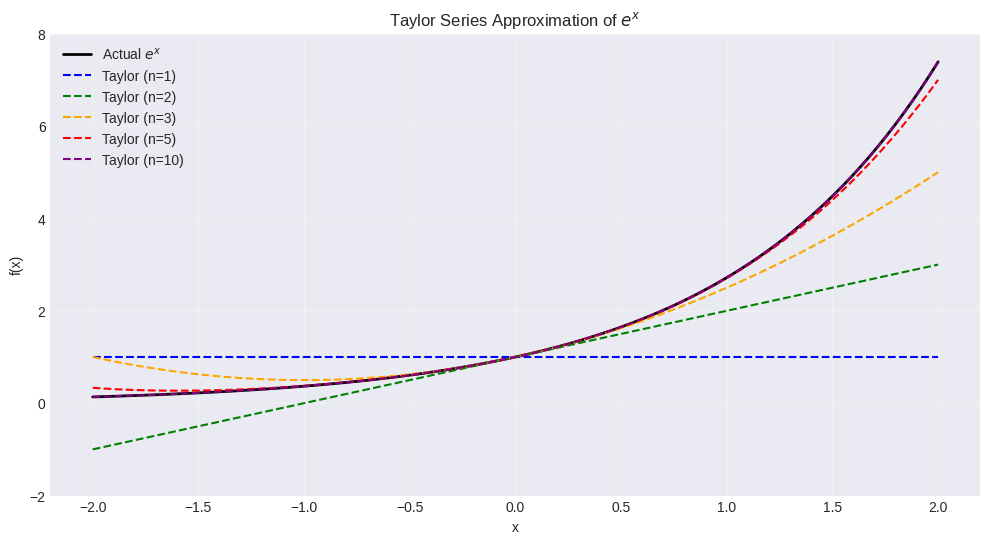

In [ ]:
# Visualizing Taylor series approximation convergence
x = np.linspace(-2, 2, 100)

plt.figure(figsize=(12, 6))

# Plot actual function
plt.plot(x, np.exp(x), 'k-', linewidth=2, label='Actual $e^x$')

# Plot Taylor approximations with different number of terms
colors = ['blue', 'green', 'orange', 'red', 'purple']
for i, n_terms in enumerate([1, 2, 3, 5, 10]):
    y_approx = [taylor_exp(xi, n_terms) for xi in x]
    plt.plot(x, y_approx, color=colors[i % len(colors)],
             linestyle='--', label=f'Taylor (n={n_terms})')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Taylor Series Approximation of $e^x$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-2, 8)
plt.show()

### 1.4 Application

**Applications of Taylor Series:**
- **Numerical computation:** Calculating transcendental functions (sin, cos, exp) in calculators and computers
- **Physics:** Approximating solutions to differential equations
- **Machine Learning:** Second-order optimization methods (Newton's method) use Taylor expansion
- **Error analysis:** Understanding how errors propagate in numerical methods

---
## 2. Limits and Derivatives from First Principles

### 2.1 Definition

The **derivative** of a function at a point represents the instantaneous rate of change. It is defined using limits:

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

This is the **first principles** or **difference quotient** definition. The derivative gives the slope of the tangent line to the function at point $x$.

### 2.2 Example

Computing the derivative of $f(x) = x^2$ from first principles:

$$f'(x) = \lim_{h \to 0} \frac{(x+h)^2 - x^2}{h} = \lim_{h \to 0} \frac{x^2 + 2xh + h^2 - x^2}{h} = \lim_{h \to 0} (2x + h) = 2x$$

In [ ]:
def derivative_first_principles(f, x, h=1e-5):
    """
    Compute derivative using first principles (numerical approximation)

    Parameters:
    f: function
    x: point at which to compute derivative
    h: small step size
    """
    return (f(x + h) - f(x)) / h

# Define function
f = lambda x: x**2

# Test at different points
test_points = [0, 1, 2, 3, 5]
print("Derivative of f(x) = x² using first principles:")
print("="*50)
for x_val in test_points:
    numerical_deriv = derivative_first_principles(f, x_val)
    analytical_deriv = 2 * x_val  # We know the derivative is 2x
    print(f"x = {x_val}: Numerical = {numerical_deriv:.6f}, Analytical = {analytical_deriv:.6f}")

Derivative of f(x) = x² using first principles:
x = 0: Numerical = 0.000010, Analytical = 0.000000
x = 1: Numerical = 2.000010, Analytical = 2.000000
x = 2: Numerical = 4.000010, Analytical = 4.000000
x = 3: Numerical = 6.000010, Analytical = 6.000000
x = 5: Numerical = 10.000010, Analytical = 10.000000


### 2.3 Visualization

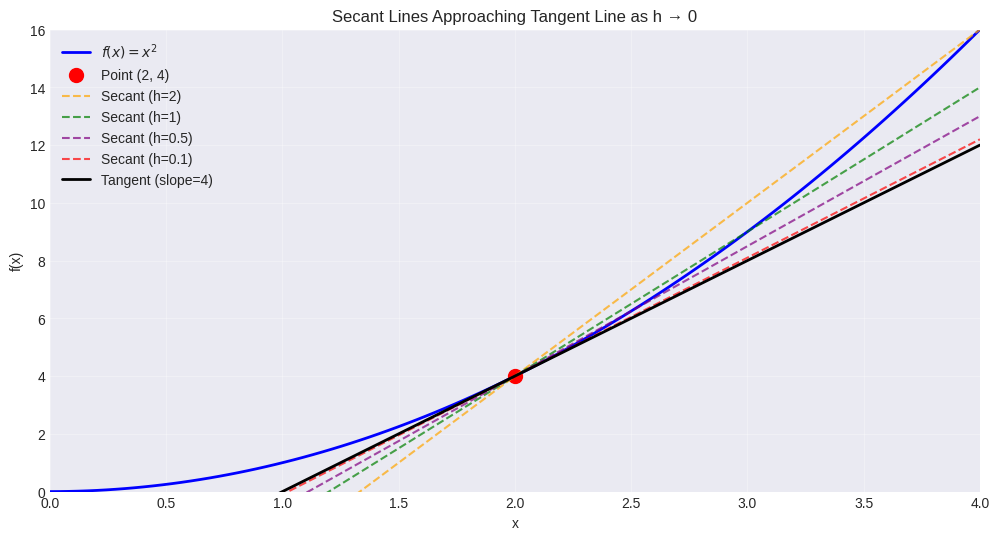

In [ ]:
# Visualizing the limit process: secant lines approaching tangent line
def f(x):
    return x**2

x0 = 2  # Point of interest
x = np.linspace(0, 4, 100)

plt.figure(figsize=(12, 6))
plt.plot(x, f(x), 'b-', linewidth=2, label='$f(x) = x^2$')

# Plot point of interest
plt.plot(x0, f(x0), 'ro', markersize=10, label=f'Point ({x0}, {f(x0)})')

# Plot secant lines with decreasing h values
h_values = [2, 1, 0.5, 0.1]
colors_secant = ['orange', 'green', 'purple', 'red']

for h, color in zip(h_values, colors_secant):
    slope = (f(x0 + h) - f(x0)) / h
    secant_line = f(x0) + slope * (x - x0)
    plt.plot(x, secant_line, color=color, linestyle='--', alpha=0.7,
             label=f'Secant (h={h})')

# Plot actual tangent line (derivative = 2x0)
tangent_slope = 2 * x0
tangent_line = f(x0) + tangent_slope * (x - x0)
plt.plot(x, tangent_line, 'k-', linewidth=2, label=f'Tangent (slope={tangent_slope})')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Secant Lines Approaching Tangent Line as h → 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 4)
plt.ylim(0, 16)
plt.show()

### 2.4 Application

**Applications of Derivatives:**
- **Physics:** Velocity (derivative of position) and acceleration (derivative of velocity)
- **Economics:** Marginal cost and marginal revenue
- **Machine Learning:** Gradient descent optimization uses derivatives to minimize loss functions
- **Engineering:** Rate of change in signals, control systems

---
## 3. Properties of Derivatives and Chain Rule

### 3.1 Definition

**Key Properties of Derivatives:**
- **Linearity:** $(af + bg)' = af' + bg'$
- **Product Rule:** $(fg)' = f'g + fg'$
- **Quotient Rule:** $(f/g)' = \frac{f'g - fg'}{g^2}$

**Chain Rule:** For composite functions $h(x) = f(g(x))$:

$$h'(x) = f'(g(x)) \cdot g'(x)$$

Or in Leibniz notation: $\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$

### 3.2 Example

Consider $h(x) = \sin(x^2)$. This is a composition where:
- Inner function: $g(x) = x^2$, so $g'(x) = 2x$
- Outer function: $f(u) = \sin(u)$, so $f'(u) = \cos(u)$

By chain rule:
$$h'(x) = \cos(x^2) \cdot 2x = 2x\cos(x^2)$$

In [ ]:
# Verify chain rule using symbolic mathematics
x = sp.Symbol('x')

# Define composite function
h = sp.sin(x**2)

# Compute derivative using SymPy
h_prime = sp.diff(h, x)

print("Function: h(x) =", h)
print("Derivative: h'(x) =", h_prime)
print("\nSimplified:", sp.simplify(h_prime))

# Numerical verification
h_func = lambda x_val: np.sin(x_val**2)
h_prime_func = lambda x_val: 2*x_val*np.cos(x_val**2)

print("\nNumerical verification at x=1:")
x_test = 1.0
numerical_deriv = derivative_first_principles(h_func, x_test)
analytical_deriv = h_prime_func(x_test)
print(f"Numerical derivative: {numerical_deriv:.6f}")
print(f"Analytical derivative: {analytical_deriv:.6f}")
print(f"Difference: {abs(numerical_deriv - analytical_deriv):.2e}")

Function: h(x) = sin(x**2)
Derivative: h'(x) = 2*x*cos(x**2)

Simplified: 2*x*cos(x**2)

Numerical verification at x=1:
Numerical derivative: 1.080593
Analytical derivative: 1.080605
Difference: 1.14e-05


### 3.3 Visualization

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1633308609.py:11: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_title('Function: $h(x) = \sin(x^2)$', fontsize=14)
/tmp/ipython-input-1633308609.py:20: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_title("Derivative: $h'(x) = 2x\cos(x^2)$", fontsize=14)


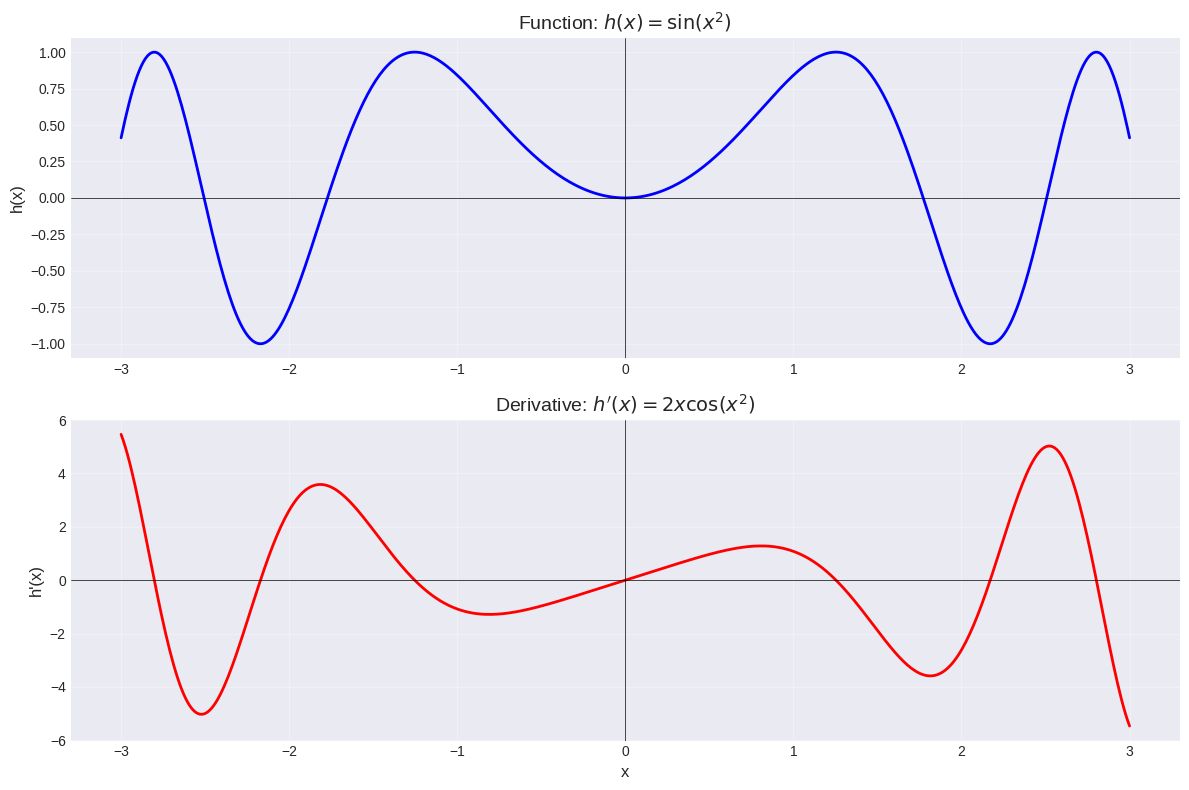

In [ ]:
# Visualize function and its derivative
x_vals = np.linspace(-3, 3, 500)
h_vals = np.sin(x_vals**2)
h_prime_vals = 2*x_vals*np.cos(x_vals**2)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot function
ax1.plot(x_vals, h_vals, 'b-', linewidth=2)
ax1.set_ylabel('h(x)', fontsize=12)
ax1.set_title('Function: $h(x) = \sin(x^2)$', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Plot derivative
ax2.plot(x_vals, h_prime_vals, 'r-', linewidth=2)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel("h'(x)", fontsize=12)
ax2.set_title("Derivative: $h'(x) = 2x\cos(x^2)$", fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

### 3.4 Application

**Applications of Chain Rule:**
- **Neural Networks:** Backpropagation algorithm uses chain rule to compute gradients through multiple layers
- **Physics:** Computing rates of change in related quantities (e.g., pressure-volume-temperature relationships)
- **Computer Graphics:** Transformations and coordinate system changes
- **Optimization:** Computing gradients of complex objective functions

---
## 4. Partial Derivatives

### 4.1 Definition

For a multivariable function $f(x, y)$, a **partial derivative** measures the rate of change with respect to one variable while holding others constant:

$$\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h, y) - f(x, y)}{h}$$

$$\frac{\partial f}{\partial y} = \lim_{h \to 0} \frac{f(x, y+h) - f(x, y)}{h}$$

The **gradient** is the vector of all partial derivatives: $\nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)$

### 4.2 Example

Consider $f(x, y) = x^2y + y^3$:

$$\frac{\partial f}{\partial x} = 2xy$$

$$\frac{\partial f}{\partial y} = x^2 + 3y^2$$

At point $(2, 1)$: $\nabla f(2,1) = (4, 7)$

In [ ]:
# Define function using SymPy
x, y = sp.symbols('x y')
f = x**2 * y + y**3

# Compute partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Function: f(x,y) =", f)
print("\nPartial Derivatives:")
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)

# Evaluate at specific point
point = {x: 2, y: 1}
gradient = (float(df_dx.subs(point)), float(df_dy.subs(point)))
print(f"\nGradient at (2,1): ∇f = {gradient}")

# Numerical verification
def f_numerical(x_val, y_val):
    return x_val**2 * y_val + y_val**3

h = 1e-6
x0, y0 = 2, 1
partial_x_numerical = (f_numerical(x0+h, y0) - f_numerical(x0, y0)) / h
partial_y_numerical = (f_numerical(x0, y0+h) - f_numerical(x0, y0)) / h

print(f"\nNumerical verification:")
print(f"∂f/∂x at (2,1): {partial_x_numerical:.6f} (analytical: {gradient[0]})")
print(f"∂f/∂y at (2,1): {partial_y_numerical:.6f} (analytical: {gradient[1]})")

Function: f(x,y) = x**2*y + y**3

Partial Derivatives:
∂f/∂x = 2*x*y
∂f/∂y = x**2 + 3*y**2

Gradient at (2,1): ∇f = (4.0, 7.0)

Numerical verification:
∂f/∂x at (2,1): 4.000001 (analytical: 4.0)
∂f/∂y at (2,1): 7.000003 (analytical: 7.0)


### 4.3 Application

**Applications of Partial Derivatives:**
- **Machine Learning:** Gradient descent uses partial derivatives to optimize multi-parameter models
- **Economics:** Marginal utilities and production functions with multiple inputs
- **Physics:** Heat flow, fluid dynamics (Navier-Stokes equations)
- **Computer Vision:** Image gradients for edge detection and feature extraction

---
## 5. Jacobian Matrix

### 5.1 Definition

The **Jacobian matrix** represents all first-order partial derivatives of a vector-valued function. For $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^m$:

$$J = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}$$

The Jacobian generalizes the derivative to vector functions and describes how the function locally transforms space.

### 5.2 Example

Consider the transformation from polar to Cartesian coordinates:

$$\mathbf{f}(r, \theta) = \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} r\cos(\theta) \\ r\sin(\theta) \end{pmatrix}$$

The Jacobian is:

$$J = \begin{bmatrix}
\cos(\theta) & -r\sin(\theta) \\
\sin(\theta) & r\cos(\theta)
\end{bmatrix}$$

The determinant $|J| = r$ gives the area scaling factor.

In [ ]:
# Define polar to Cartesian transformation symbolically
r, theta = sp.symbols('r theta', real=True, positive=True)

# Define transformation
x_transform = r * sp.cos(theta)
y_transform = r * sp.sin(theta)

# Compute Jacobian matrix
jacobian = sp.Matrix([
    [sp.diff(x_transform, r), sp.diff(x_transform, theta)],
    [sp.diff(y_transform, r), sp.diff(y_transform, theta)]
])

print("Polar to Cartesian Transformation:")
print(f"x = {x_transform}")
print(f"y = {y_transform}")
print("\nJacobian Matrix:")
print(jacobian)
print("\nDeterminant of Jacobian:")
det_J = sp.simplify(jacobian.det())
print(f"|J| = {det_J}")

# Evaluate at specific point
r_val, theta_val = 2, np.pi/4
J_numerical = np.array(jacobian.subs({r: r_val, theta: theta_val})).astype(float)
print(f"\nJacobian at (r={r_val}, θ={theta_val:.4f}):")
print(J_numerical)
print(f"Determinant: {np.linalg.det(J_numerical):.4f}")

Polar to Cartesian Transformation:
x = r*cos(theta)
y = r*sin(theta)

Jacobian Matrix:
Matrix([[cos(theta), -r*sin(theta)], [sin(theta), r*cos(theta)]])

Determinant of Jacobian:
|J| = r

Jacobian at (r=2, θ=0.7854):
[[ 0.70710678 -1.41421356]
 [ 0.70710678  1.41421356]]
Determinant: 2.0000


### 5.3 Application

**Applications of Jacobian Matrix:**
- **Robotics:** Forward and inverse kinematics, relating joint velocities to end-effector velocities
- **Computer Graphics:** Coordinate transformations, texture mapping
- **Neural Networks:** Backpropagation through complex network architectures
- **Numerical Methods:** Newton-Raphson method for systems of equations
- **Physics:** Change of variables in multiple integrals (the determinant gives the volume scaling)

---
## 6. Convex vs Non-Convex Functions

### 6.1 Definition

A function $f$ is **convex** on an interval if for any two points $x_1, x_2$ and any $\lambda \in [0,1]$:

$$f(\lambda x_1 + (1-\lambda)x_2) \leq \lambda f(x_1) + (1-\lambda)f(x_2)$$

Geometrically, a line segment connecting any two points on the function lies above or on the graph.

**Test for convexity:** A twice-differentiable function is convex if and only if $f''(x) \geq 0$ for all $x$.

**Non-convex functions** don't satisfy this property and may have multiple local minima.

### 6.2 Example

**Convex examples:**
- $f(x) = x^2$ (parabola): $f''(x) = 2 > 0$
- $f(x) = e^x$: $f''(x) = e^x > 0$
- $f(x) = |x|$: Convex but not differentiable at $x=0$

**Non-convex examples:**
- $f(x) = x^3$: $f''(x) = 6x$ (changes sign)
- $f(x) = \sin(x)$: $f''(x) = -\sin(x)$ (changes sign)
- $f(x) = x^4 - 4x^2$: Has multiple local minima

In [ ]:
# Test convexity of different functions
def test_convexity(f, f_second_deriv, x_range, name):
    """
    Test if a function is convex by checking second derivative
    """
    x = np.linspace(x_range[0], x_range[1], 100)
    second_deriv = f_second_deriv(x)

    is_convex = np.all(second_deriv >= -1e-10)  # Allow small numerical errors

    print(f"Function: {name}")
    print(f"  Second derivative range: [{second_deriv.min():.4f}, {second_deriv.max():.4f}]")
    print(f"  Convex: {is_convex}")
    print()

# Test examples
print("CONVEXITY TESTS")
print("="*50)

# Convex: f(x) = x^2
test_convexity(
    lambda x: x**2,
    lambda x: 2 * np.ones_like(x),
    (-5, 5),
    "f(x) = x²"
)

# Convex: f(x) = e^x
test_convexity(
    lambda x: np.exp(x),
    lambda x: np.exp(x),
    (-2, 2),
    "f(x) = e^x"
)

# Non-convex: f(x) = x^3
test_convexity(
    lambda x: x**3,
    lambda x: 6 * x,
    (-5, 5),
    "f(x) = x³"
)

# Non-convex: f(x) = sin(x)
test_convexity(
    lambda x: np.sin(x),
    lambda x: -np.sin(x),
    (0, 2*np.pi),
    "f(x) = sin(x)"
)

CONVEXITY TESTS
Function: f(x) = x²
  Second derivative range: [2.0000, 2.0000]
  Convex: True

Function: f(x) = e^x
  Second derivative range: [0.1353, 7.3891]
  Convex: True

Function: f(x) = x³
  Second derivative range: [-30.0000, 30.0000]
  Convex: False

Function: f(x) = sin(x)
  Second derivative range: [-0.9999, 0.9999]
  Convex: False



### 6.3 Visualization

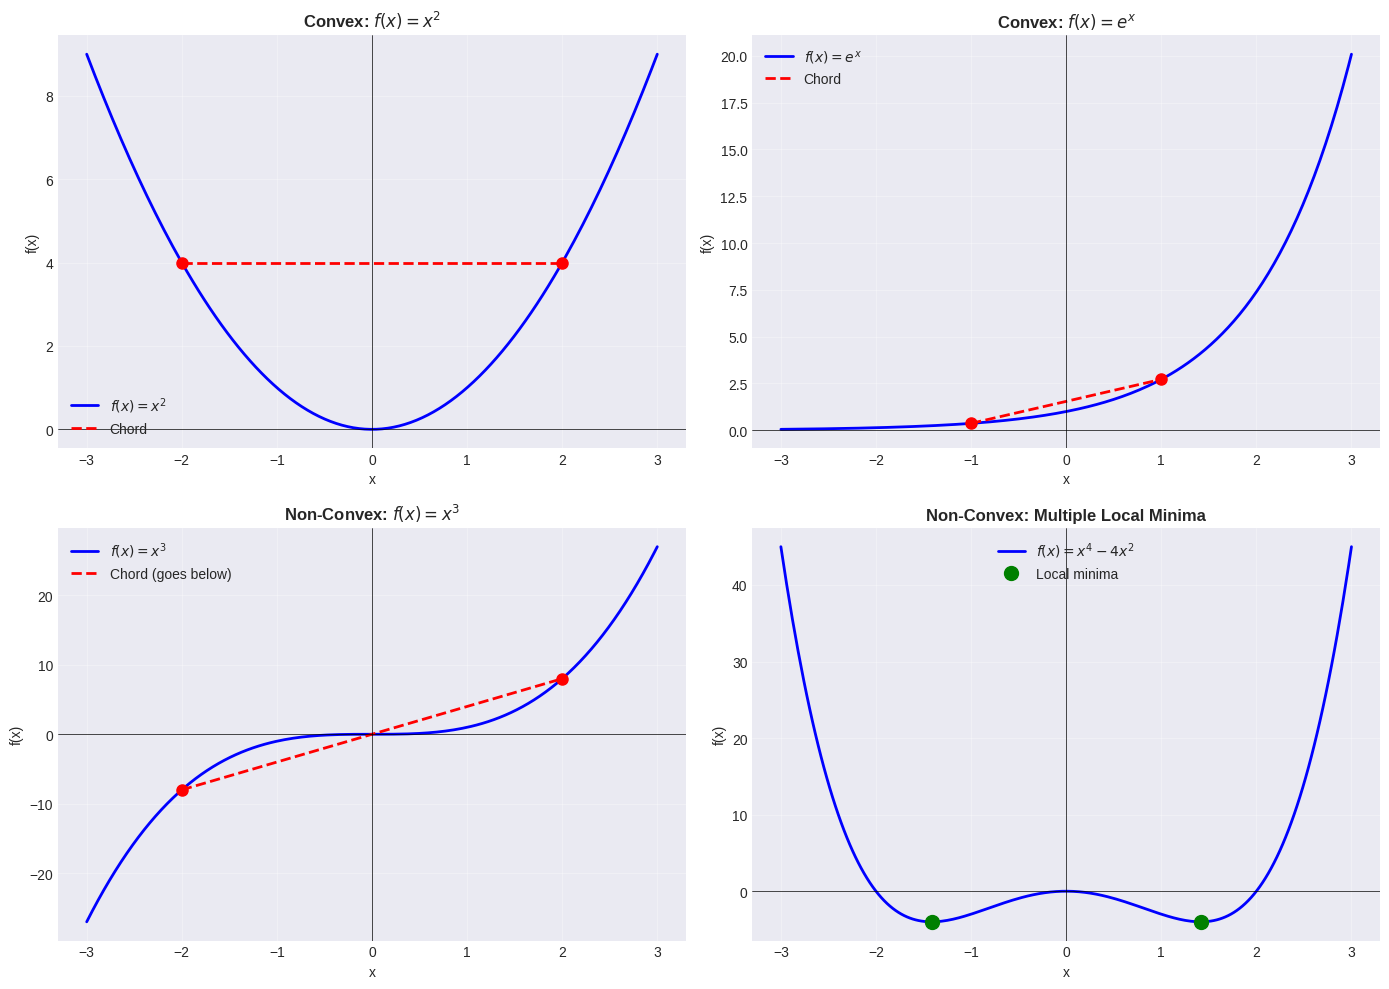

In [ ]:
# Visualize convex vs non-convex functions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x = np.linspace(-3, 3, 200)

# Plot 1: Convex - x^2
ax = axes[0, 0]
y = x**2
ax.plot(x, y, 'b-', linewidth=2, label='$f(x) = x^2$')
# Show chord between two points
x1, x2 = -2, 2
ax.plot([x1, x2], [x1**2, x2**2], 'r--', linewidth=2, label='Chord')
ax.plot([x1, x2], [x1**2, x2**2], 'ro', markersize=8)
ax.set_title('Convex: $f(x) = x^2$', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Convex - e^x
ax = axes[0, 1]
y = np.exp(x)
ax.plot(x, y, 'b-', linewidth=2, label='$f(x) = e^x$')
x1, x2 = -1, 1
ax.plot([x1, x2], [np.exp(x1), np.exp(x2)], 'r--', linewidth=2, label='Chord')
ax.plot([x1, x2], [np.exp(x1), np.exp(x2)], 'ro', markersize=8)
ax.set_title('Convex: $f(x) = e^x$', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Non-convex - x^3
ax = axes[1, 0]
y = x**3
ax.plot(x, y, 'b-', linewidth=2, label='$f(x) = x^3$')
x1, x2 = -2, 2
ax.plot([x1, x2], [x1**3, x2**3], 'r--', linewidth=2, label='Chord (goes below)')
ax.plot([x1, x2], [x1**3, x2**3], 'ro', markersize=8)
ax.set_title('Non-Convex: $f(x) = x^3$', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Non-convex with multiple minima - x^4 - 4x^2
ax = axes[1, 1]
y = x**4 - 4*x**2
ax.plot(x, y, 'b-', linewidth=2, label='$f(x) = x^4 - 4x^2$')
# Mark local minima
minima_x = [-np.sqrt(2), np.sqrt(2)]
minima_y = [m**4 - 4*m**2 for m in minima_x]
ax.plot(minima_x, minima_y, 'go', markersize=10, label='Local minima')
ax.set_title('Non-Convex: Multiple Local Minima', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

for ax in axes.flat:
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')

plt.tight_layout()
plt.show()

### 6.4 Application

**Applications of Convexity:**
- **Optimization:** Convex optimization problems have a unique global minimum, making them easier to solve
- **Machine Learning:**
  - Linear regression and logistic regression use convex loss functions
  - Guarantees that gradient descent will find the global optimum
  - Neural networks are non-convex, requiring careful initialization and training
- **Economics:** Convex preferences in utility theory, production functions
- **Signal Processing:** Convex relaxation of combinatorial problems

**Why convexity matters:** For convex functions, any local minimum is a global minimum, and gradient-based methods are guaranteed to converge to the optimal solution.

---
## 7. Curvature and Second Derivatives

### 7.1 Definition

The **second derivative** $f''(x)$ measures how the rate of change (first derivative) is changing. It describes the **curvature** of a function:

- $f''(x) > 0$: Function is **concave up** (curves upward, like a valley)
- $f''(x) < 0$: Function is **concave down** (curves downward, like a hill)
- $f''(x) = 0$: Possible **inflection point** (curvature changes)

The second derivative is crucial for:
- Identifying local minima (where $f'(x)=0$ and $f''(x)>0$)
- Identifying local maxima (where $f'(x)=0$ and $f''(x)<0$)
- Understanding the shape and behavior of functions

### 7.2 Example

Consider $f(x) = x^3 - 3x$:
- First derivative: $f'(x) = 3x^2 - 3$
- Second derivative: $f''(x) = 6x$

Critical points (where $f'(x) = 0$): $x = \pm 1$
- At $x = -1$: $f''(-1) = -6 < 0$ → Local maximum
- At $x = 1$: $f''(1) = 6 > 0$ → Local minimum
- At $x = 0$: $f''(0) = 0$ → Inflection point

In [ ]:
# Analyze function using derivatives
x_sym = sp.Symbol('x')
f_sym = x_sym**3 - 3*x_sym

# Compute derivatives
f_prime = sp.diff(f_sym, x_sym)
f_double_prime = sp.diff(f_prime, x_sym)

print("Function Analysis: f(x) = x³ - 3x")
print("="*50)
print(f"First derivative: f'(x) = {f_prime}")
print(f"Second derivative: f''(x) = {f_double_prime}")

# Find critical points
critical_points = sp.solve(f_prime, x_sym)
print(f"\nCritical points: {critical_points}")

# Classify critical points
print("\nClassification:")
for cp in critical_points:
    second_deriv_value = f_double_prime.subs(x_sym, cp)
    f_value = f_sym.subs(x_sym, cp)

    if second_deriv_value > 0:
        classification = "Local minimum"
    elif second_deriv_value < 0:
        classification = "Local maximum"
    else:
        classification = "Inconclusive (second derivative test)"

    print(f"  x = {cp}: f''({cp}) = {second_deriv_value} → {classification}")
    print(f"           f({cp}) = {f_value}")

# Find inflection points
inflection_points = sp.solve(f_double_prime, x_sym)
print(f"\nInflection points (where f''(x) = 0): {inflection_points}")

Function Analysis: f(x) = x³ - 3x
First derivative: f'(x) = 3*x**2 - 3
Second derivative: f''(x) = 6*x

Critical points: [-1, 1]

Classification:
  x = -1: f''(-1) = -6 → Local maximum
           f(-1) = 2
  x = 1: f''(1) = 6 → Local minimum
           f(1) = -2

Inflection points (where f''(x) = 0): [0]


### 7.3 Visualization

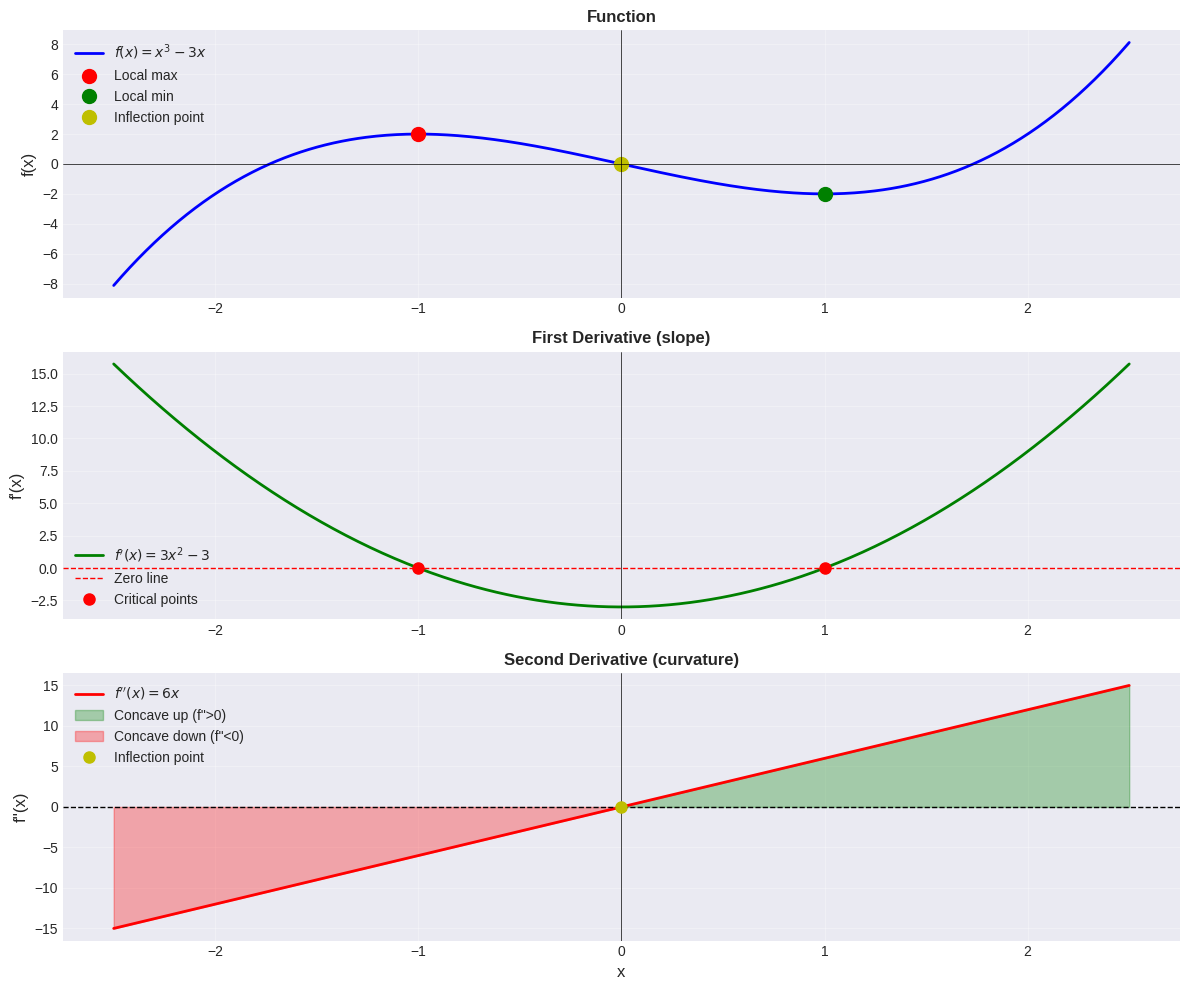

In [ ]:
# Visualize function, derivatives, and curvature
x = np.linspace(-2.5, 2.5, 500)
f = x**3 - 3*x
f_prime = 3*x**2 - 3
f_double_prime = 6*x

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot function
ax = axes[0]
ax.plot(x, f, 'b-', linewidth=2, label='$f(x) = x^3 - 3x$')
# Mark critical points
ax.plot(-1, (-1)**3 - 3*(-1), 'ro', markersize=10, label='Local max')
ax.plot(1, 1**3 - 3*1, 'go', markersize=10, label='Local min')
ax.plot(0, 0, 'yo', markersize=10, label='Inflection point')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Function', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot first derivative
ax = axes[1]
ax.plot(x, f_prime, 'g-', linewidth=2, label="$f'(x) = 3x^2 - 3$")
ax.axhline(y=0, color='r', linewidth=1, linestyle='--', label='Zero line')
ax.axvline(x=0, color='k', linewidth=0.5)
ax.plot([-1, 1], [0, 0], 'ro', markersize=8, label='Critical points')
ax.set_ylabel("f'(x)", fontsize=12)
ax.set_title('First Derivative (slope)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot second derivative
ax = axes[2]
ax.plot(x, f_double_prime, 'r-', linewidth=2, label="$f''(x) = 6x$")
ax.axhline(y=0, color='k', linewidth=1, linestyle='--')
ax.axvline(x=0, color='k', linewidth=0.5)
ax.fill_between(x, 0, f_double_prime, where=(f_double_prime > 0),
                 alpha=0.3, color='green', label='Concave up (f">0)')
ax.fill_between(x, 0, f_double_prime, where=(f_double_prime < 0),
                 alpha=0.3, color='red', label='Concave down (f"<0)')
ax.plot(0, 0, 'yo', markersize=8, label='Inflection point')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel("f''(x)", fontsize=12)
ax.set_title('Second Derivative (curvature)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.4 Application

**Applications of Second Derivatives:**
- **Optimization:**
  - Second derivative test determines if critical points are minima or maxima
  - Newton's method uses second derivatives for faster convergence
  - Hessian matrix (matrix of second partial derivatives) characterizes optimization landscape
- **Physics:**
  - Acceleration is the second derivative of position
  - Wave equations involve second derivatives
- **Economics:** Diminishing returns, risk aversion
- **Machine Learning:**
  - Second-order optimization methods (L-BFGS, Newton's method)
  - Understanding loss surface curvature helps with training stability

---
## 8. Summary and Key Takeaways


1. **Taylor Series:** Approximate complex functions using polynomials
2. **Limits & Derivatives:** Foundation of calculus - rate of change from first principles
3. **Chain Rule:** Essential for computing derivatives of composite functions
4. **Partial Derivatives:** Extend derivatives to multivariable functions
5. **Jacobian Matrix:** Represents transformations in vector calculus
6. **Convexity:** Crucial property for optimization guarantees
7. **Curvature:** Second derivatives characterize function shape and extrema

